# Korean Bill

In [32]:
from konlpy.corpus import kobill    # Docs from pokr.kr/bill
files_ko = kobill.fileids()         # Get file ids
doc_ko = kobill.open('/1809890.txt').read()

In [33]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.morphs(doc_ko)

In [34]:
import nltk

In [35]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [36]:
print(len(ko.tokens))       # returns number of tokens (document length)
print(len(set(ko.tokens)))  # returns number of unique tokens
ko.vocab()                  # returns frequency distribution

1707
476


FreqDist({'%': 10,
          '(': 27,
          ')': 26,
          ').': 1,
          '+': 3,
          ',': 26,
          '-': 21,
          '--------': 1,
          '----------': 1,
          '-------------------------': 1,
          '---------------------------': 2,
          '----------------------------': 4,
          '--------------.': 1,
          '-------------.---------------': 1,
          '.': 61,
          '/': 1,
          '0': 5,
          '02': 1,
          '056': 1,
          '1': 13,
          '10': 6,
          '11': 2,
          '12': 1,
          '145': 1,
          '184': 1,
          '185': 1,
          '19': 1,
          '2': 11,
          '20': 1,
          '200': 2,
          '2007': 3,
          '2008': 1,
          '2009': 1,
          '2010': 3,
          '2011': 6,
          '21': 2,
          '29': 1,
          '291': 1,
          '3': 8,
          '30': 1,
          '34': 1,
          '35': 1,
          '396': 1,
          '4': 8,
          '40': 7,
     

/home/jason/dev/django/myvenv/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


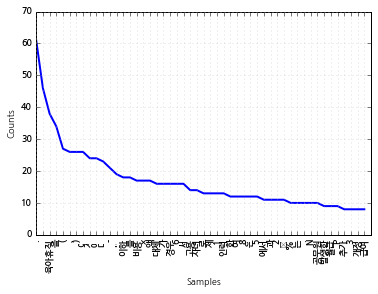

In [37]:
%matplotlib inline
from matplotlib import font_manager, rc
#font_fname = 'meiryob.ttc'     # A font of your choice
#font_name = font_manager.FontProperties(fname=font_fname).get_name()
font_manager.get_fontconfig_fonts() #한글폰트 설정
font_info = {'family' : 'nanumgothic', 'weight' : 'bold', 'size'   : 9} #나눔고딕으로 설정. 다른 
rc('font', **font_info)

ko.plot(50)     # Plot sorted frequency of top 50 tokens

In [38]:
ko.count('초등학교') # Counts occurrences

6

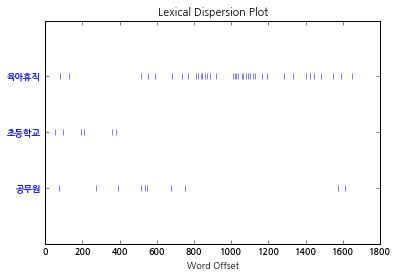

In [41]:
from nltk.draw.dispersion import dispersion_plot
# dispersion_plot definition is changed : ko.dispersion_plot(['육아휴직', '초등학교', '공무원']) is no longer working.
dispersion_plot(ko, ['육아휴직', '초등학교', '공무원'])

In [42]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 ․ 김정훈 김학송 의원 ( 10 인 ) 제안 이유 및 주요 내용 초등학교 저학년 의 경우 에도 부모 의 따뜻한 사랑 과 보살핌 이 필요 한
 을 할 수 있는 자녀 의 나이 는 만 6 세 이하 로 되어 있어 초등학교 저학년 인 자녀 를 돌보기 위해서 는 해당 부모님 은 일자리 를 
 다 . 제 63 조제 2 항제 4 호 중 “ 만 6 세 이하 의 초등학교 취학 전 자녀 를 ” 을 “ 만 8 세 이하 ( 취학 중인 경우 
 전 자녀 를 ” 을 “ 만 8 세 이하 ( 취학 중인 경우 에는 초등학교 2 학년 이하 를 말한 다 ) 의 자녀 를 ” 로 한 다 . 부 
 . ∼ 3 . ( 현행 과 같 음 ) 4 . 만 6 세 이하 의 초등학교 취 4 . 만 8 세 이하 ( 취학 중인 경우 학 전 자녀 를 양
세 이하 ( 취학 중인 경우 학 전 자녀 를 양육 하기 위하 에는 초등학교 2 학년 이하 를 여 필요하거 나 여자 공무원 이 말한 다 ) 의


In [43]:
ko.similar('자녀')

논의


In [44]:
ko.similar('육아휴직')

In [45]:
ko.collocations()

초등학교 저학년; 육아휴직 대상자


In [47]:
from konlpy.tag import Twitter; t = Twitter()
tags_ko = t.pos("작고 노란 강아지가 페르시안 고양이에게 짖었다")
tags_ko

[('작고', 'Noun'),
 ('노란', 'Adjective'),
 ('강아지', 'Noun'),
 ('가', 'Josa'),
 ('페르시안', 'Noun'),
 ('고양이', 'Noun'),
 ('에게', 'Josa'),
 ('짖었', 'Noun'),
 ('다', 'Josa')]

In [49]:
parser_ko = nltk.RegexpParser("NP: {<Adjective><Noun>}")
chunks_ko = parser_ko.parse(tags_ko)
chunks_ko.draw() # if module is not installed, you should install python3-tk (run this : sudo apt-get install python3-tk)

# Preprocessing

1. Load documents

In [50]:
from konlpy.corpus import kobill
docs_ko = [kobill.open(i).read() for i in kobill.fileids()]

In [52]:
from konlpy.tag import Twitter; t = Twitter()
pos = lambda d: ['/'.join(p) for p in t.pos(d, stem=True, norm=True)]
texts_ko = [pos(doc) for doc in docs_ko]
print(texts_ko[0])

['국군/Noun', '부대/Noun', '의/Josa', '아랍에미리트/Noun', '(/Punctuation', 'UAE/Alpha', ')/Punctuation', '군/Noun', '교육/Noun', '훈련/Noun', '지원/Noun', '등/Noun', '에/Josa', '관/Noun', '하다/Verb', '파견/Noun', '동의/Noun', '안/Noun', '의안/Noun', '제출/Noun', '연월일/Noun', ':/Punctuation', '2010/Number', './Punctuation', '11/Number', './Punctuation', '15/Number', './Punctuation', '9897/Number', '번호/Noun', '제/Noun', '추다/Verb', '자/Noun', ':/Punctuation', '정/Noun', '부/Noun', '제안/Noun', '이유/Noun', '가다/Verb', './Punctuation', 'UAE/Alpha', '측/Suffix', '요청/Noun', '과/Josa', '협의/Noun', '에/Josa', '따르다/Verb', ',/Punctuation', '국익/Noun', '창/Noun', '추다/Verb', '다양하다/Adjective', '지역/Noun', '에서의/Josa', '우리/Noun', '특/Noun', '전부/Noun', '대/Suffix', '임무/Noun', '수행/Noun', '능력/Noun', '향상/Noun', '등/Noun', '을/Josa', '목적/Noun', '으로/Josa', '국군/Noun', '부대/Noun', '를/Josa', 'UAE/Alpha', '에/Josa', '파견/Noun', '하다/Verb', '것임/Noun', './Punctuation', '나/Noun', './Punctuation', '국군/Noun', '부대/Noun', '파견/Noun', '을/Josa', '계기/Noun', '로/Josa', '우리/Nou

In [55]:
from gensim import corpora
dictionary_ko = corpora.Dictionary(texts_ko)
dictionary_ko.save('ko.dict')

In [56]:
from gensim import models
tf_ko = [dictionary_ko.doc2bow(text) for text in texts_ko]
tfidf_model_ko = models.TfidfModel(tf_ko)
tfidf_ko = tfidf_model_ko[tf_ko]
corpora.MmCorpus.serialize('ko.mm', tfidf_ko) # save corpus to file for future use

# print first 10 elements of first document's tf-idf vector
print(tfidf_ko.corpus[0][:10])

# print top 10 elements of first document's tf-idf vector
print(sorted(tfidf_ko.corpus[0], key=lambda x: x[1], reverse=True)[:10])

# print token of most frequent element
print(dictionary_ko.get(414))

[(0, 1), (1, 2), (2, 2), (3, 1), (4, 1), (5, 1), (6, 13), (7, 3), (8, 2), (9, 1)]
[(339, 64), (222, 50), (382, 41), (282, 34), (344, 32), (306, 27), (150, 24), (281, 22), (380, 20), (136, 18)]
지급/Noun


In [57]:
ntopics, nwords = 3, 5
lsi_ko = models.lsimodel.LsiModel(tfidf_ko, id2word=dictionary_ko, num_topics=ntopics)
print(lsi_ko.print_topics(num_topics=ntopics, num_words=nwords))

[(0, '0.518*"육아휴직/Noun" + 0.257*"만/Noun" + 0.227*"×/Foreign" + 0.214*"대체/Noun" + 0.201*"고용/Noun"'), (1, '-0.449*"파견/Noun" + -0.412*"부대/Noun" + -0.267*"UAE/Alpha" + -0.243*"○/Foreign" + -0.192*"국군/Noun"'), (2, '-0.326*"결혼/Noun" + -0.315*"예고/Noun" + -0.285*"손해/Noun" + -0.205*"ㆍ/Foreign" + -0.197*"원사/Noun"')]


In [58]:
import numpy as np; np.random.seed(42)  # optional
lda_ko = models.ldamodel.LdaModel(tfidf_ko, id2word=dictionary_ko, num_topics=ntopics)
print(lda_ko.print_topics(num_topics=ntopics, num_words=nwords))

[(0, '0.002*육아휴직/Noun + 0.002*결혼/Noun + 0.002*손해/Noun + 0.001*대체/Noun + 0.001*만/Noun'), (1, '0.001*육아휴직/Noun + 0.001*부대/Noun + 0.001*파견/Noun + 0.001*第/Foreign + 0.001*○/Foreign'), (2, '0.002*육아휴직/Noun + 0.002*학위/Noun + 0.001*간호/Noun + 0.001*×/Foreign + 0.001*만/Noun')]


In [59]:
import numpy as np; np.random.seed(42)  # optional
hdp_ko = models.hdpmodel.HdpModel(tfidf_ko, id2word=dictionary_ko)
print(hdp_ko.print_topics(topics=ntopics, topn=nwords))

['topic 0: 0.004*느/Noun + 0.004*이사철/Noun + 0.004*923/Number + 0.004*난민/Noun + 0.004*팀/Noun', 'topic 1: 0.005*최초/Noun + 0.004*자원/Noun + 0.004*·/Foreign + 0.004*당사자/Noun + 0.004*자본금/Noun', 'topic 2: 0.004*중/Noun + 0.004*세심/Noun + 0.004*정이/Noun + 0.004*LYNX/Alpha + 0.003*로써/Noun']


In [60]:
bow = tfidf_model_ko[dictionary_ko.doc2bow(texts_ko[0])]
sorted(lsi_ko[bow], key=lambda x: x[1], reverse=True)
sorted(lda_ko[bow], key=lambda x: x[1], reverse=True)
sorted(hdp_ko[bow], key=lambda x: x[1], reverse=True)

[(0, 0.62172337978460435),
 (1, 0.32164332469317131),
 (2, 0.013217603232113271),
 (3, 0.010098230302428082)]

In [61]:
bow = tfidf_model_ko[dictionary_ko.doc2bow(texts_ko[1])]
sorted(lsi_ko[bow], key=lambda x: x[1], reverse=True)
sorted(lda_ko[bow], key=lambda x: x[1], reverse=True)
sorted(hdp_ko[bow], key=lambda x: x[1], reverse=True)

[(2, 0.42699350650134382), (1, 0.35359359998336837), (0, 0.18116544491081907)]

# word2vec toy problem

1. Load documents

In [62]:
from konlpy.corpus import kobill
docs_ko = [kobill.open(i).read() for i in kobill.fileids()]

2. Tokenize

In [ ]:
from konlpy.tag import Twitter; t = Twitter()
pos = lambda d: ['/'.join(p) for p in t.pos(d)]
texts_ko = [pos(doc) for doc in docs_ko]